In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
import matplotlib.colors as colors

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

In [2]:
def load_binary_data(filename, dtype=np.float32): 
    """ 
    We assume that the data was written 
    with write_binary_data() (little endian). 
    """ 
    f = open(filename, "rb") 
    data = f.read() 
    f.close() 
    _data = np.frombuffer(data, dtype) 
    if sys.byteorder == 'big':
        _data = _data.byteswap()
    return _data

In [4]:
x = load_binary_data('../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
x = np.reshape(x, (256,256,256))

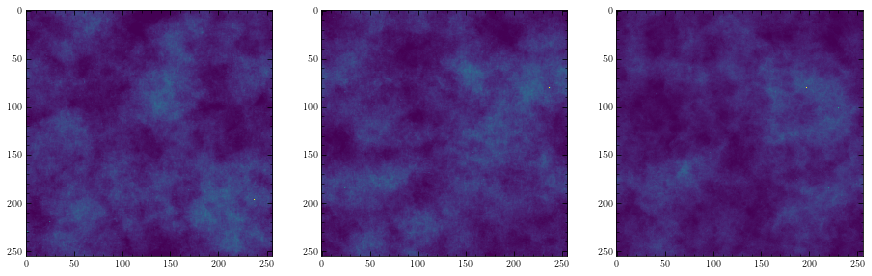

In [9]:
plt.figure(figsize=(15, 8))
plt.subplot(131)
plt.imshow(np.mean(x, axis = 0))
plt.subplot(132)
plt.imshow(np.mean(x, axis = 1))
plt.subplot(133)
plt.imshow(np.mean(x, axis = 2))
plt.show()

In [14]:
f = '/data4/tcox/runs/full_run_1/Boxes/delta_T_v3_z008.42_nf0.650315_useTs1_256_200Mpc'
data = load_binary_data(f)
data_3d = np.reshape(data,(256,256,256))

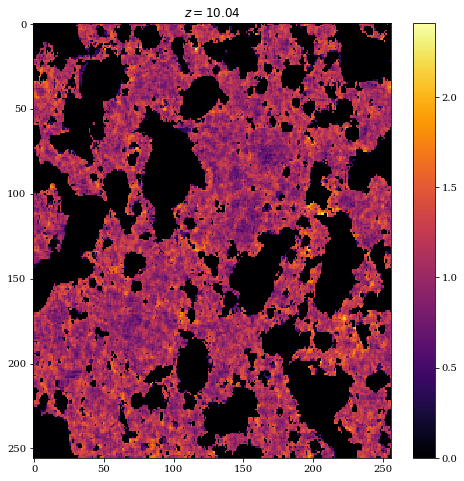

In [20]:
plt.figure(figsize=(8, 8))
plt.title(r'$z = 10.04$')
plt.imshow(np.log10(data_3d[:,:,10]+1), aspect='auto', cmap = 'inferno')
plt.colorbar()
plt.show()

## $\delta T$ across time

In [25]:
files = glob.glob('/data4/tcox/runs/full_run_1/Boxes/delta_T_v3_z*')
files.sort()
files = files[::-1]

In [26]:
files_dt = files[:-15]

In [27]:
mean_tb = []
zs = []
for f in files_dt:
    mean_tb.append(load_binary_data(f).mean())
    zs.append(float(f.split('z')[1][:6]))

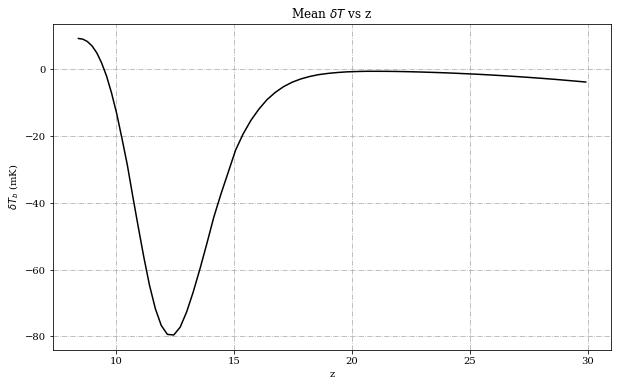

In [28]:
plt.figure(figsize=(10,6))
plt.title('Mean $\delta T$ vs z')
plt.plot(zs,mean_tb, 'k')
plt.xlabel('z')
plt.ylabel('$\delta T_b$ (mK)')
plt.grid(linestyle='dashdot', zorder=0)
plt.show()

In [34]:
f = '/data4/tcox/runs/full_run_1/Boxes/xH_z*'
files = glob.glob(f)
files.sort()
files = files[::-1]

xH = []
zs = []

for fs in files:
    data = load_binary_data(fs)
    xH.append(data.mean())
    zs.append(float(fs.split('/')[-1].split('_')[1][1:]))

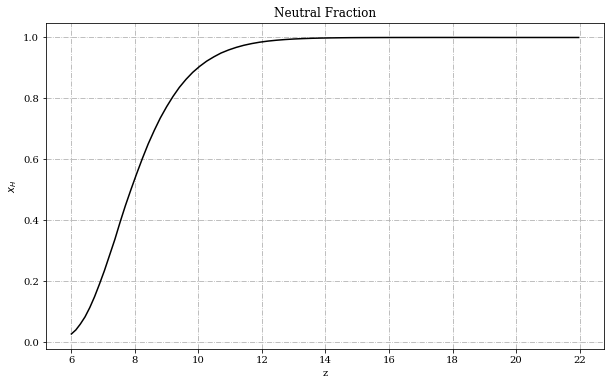

In [35]:
plt.figure(figsize=(10,6))
plt.plot(zs[15:],xH[15:], 'k')
plt.grid(linestyle='dashdot', zorder=0)
plt.ylabel(r'$x_{H}$')
plt.xlabel(r'z')
plt.title('Neutral Fraction')
plt.show()

From [21cmFAST](https://github.com/andreimesinger/21cmFAST/tree/master/Out-of-box_Output) the first column is the wavenumber k, the second column is the power spectrum in k, the last column is the variance in the power

In [37]:
files = glob.glob('/data4/tcox/runs/full_run_1/Output_files/Deldel_T_power_spec/*')
files.sort()

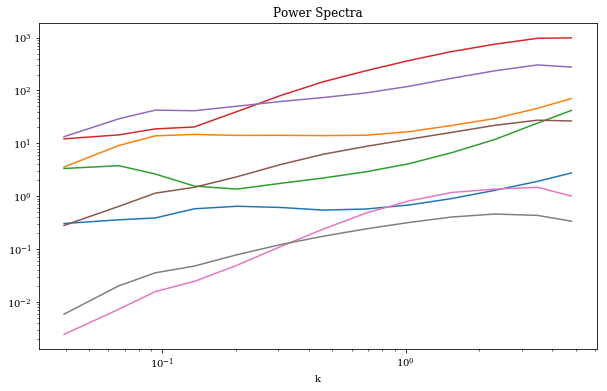

In [38]:
plt.figure(figsize=(10,6))

for f in files[::10]:
    pspec = np.genfromtxt(f)
    plt.plot(pspec[:,0], pspec[:,1])
    
plt.xscale('log')
plt.yscale('log')
plt.title('Power Spectra')  
plt.xlabel(r'k')
plt.show()

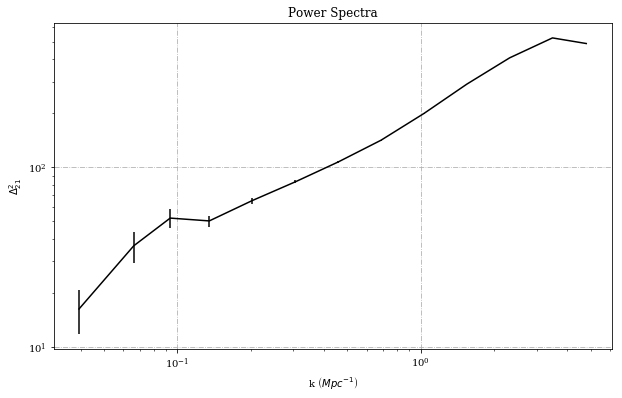

In [39]:
plt.figure(figsize=(10,6))
pspec = np.genfromtxt(files[int(len(files)/2)])
plt.errorbar(pspec[:,0], pspec[:,1], yerr=pspec[:,2], color = 'black')
plt.xscale('log')
plt.yscale('log')
plt.title('Power Spectra')  
plt.xlabel(r'k $\left(Mpc^{-1}\right)$')
plt.ylabel('$\Delta_{21}^2$')
plt.grid(linestyle='dashdot', zorder=0)
plt.show()

In [93]:
f1 = '/data4/tcox/runs/full_run_1/Boxes/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc'
f2 = '/data4/tcox/runs/full_run_1/Boxes/updated_smoothed_deltax_z007.04_256_200Mpc'

d1 = load_binary_data(f1)
d2 = load_binary_data(f2)

d1 = np.reshape(d1,(256,256,256))
d2 = np.reshape(d2,(256,256,256))

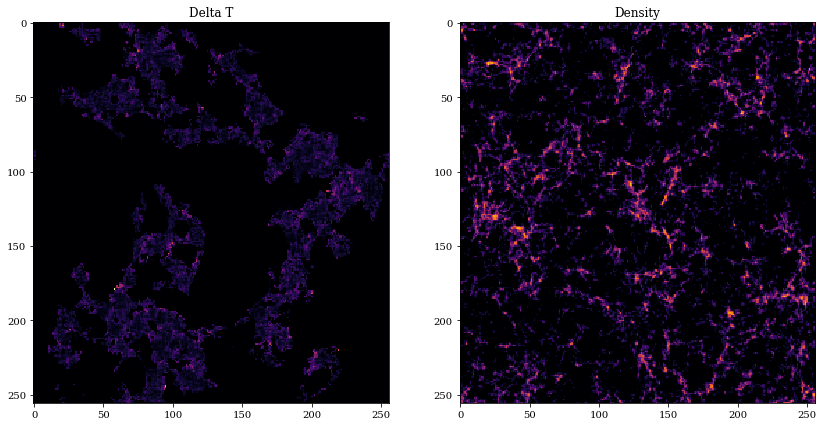

In [95]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(d1[:,:,128], aspect='auto', cmap = 'inferno', vmax = 130, vmin = 0)
plt.title('Delta T')

plt.subplot(1,2,2)
plt.imshow(d2[:,:,128], aspect='auto', cmap = 'inferno',
           norm=colors.SymLogNorm(vmin=0,vmax=10,linthresh=2))
plt.title(r'Density')
plt.show()

## Spin Temperature Evolution

In [47]:
f2 = '/data4/tcox/runs/full_run_1/Boxes/Ts_z007.04_L_X3.2e+40_alphaX1.0_f_star0.0500_alpha_star0.5000_f_esc0.1000_alpha_esc-0.5000_Mturn5.0e+08_t_star0.5000_Pop2_256_200Mpc'
d2 = load_binary_data(f2)
d2 = np.reshape(d2,(256,256,256))

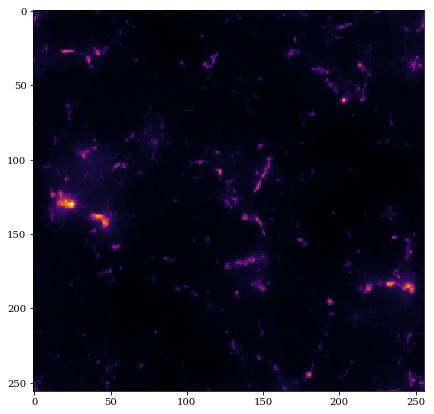

In [50]:
plt.figure(figsize=(7,7))
plt.imshow(d2[:,:,128], aspect='auto', cmap = 'inferno')
plt.show()

In [51]:
files = glob.glob('/data4/tcox/runs/full_run_1/Boxes/Ts_z*')
files.sort()
files = files[::-1]

zs = []

for f in files:
    zs.append(float(f.split('/')[-1].split('_')[1][1:]))

In [52]:
mean = []

for f in files:
    d1 = load_binary_data(f)
    mean.append(d1.mean())

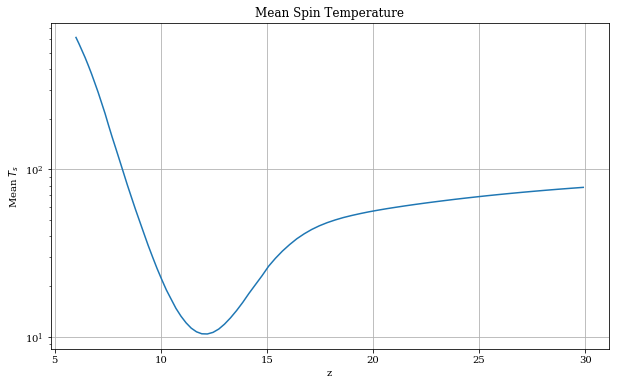

In [55]:
plt.figure(figsize=(10,6))
plt.plot(zs,mean)
plt.yscale('log')
plt.title('Mean Spin Temperature')
plt.xlabel('z')
plt.ylabel(r'Mean $T_s$')
plt.grid()
plt.show()

## Example Plots

In [57]:
data = load_binary_data('/data4/tcox/runs/full_run_1/Boxes/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
data_3d = np.reshape(data,(256,256,256))

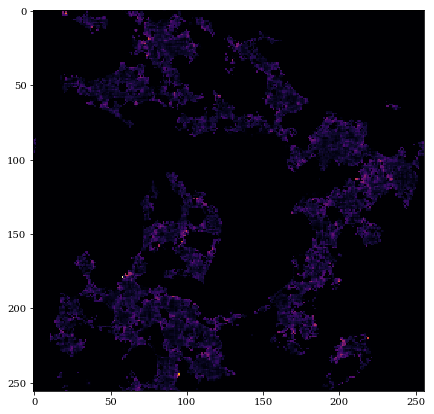

In [64]:
plt.figure(figsize=(7,7))
plt.imshow(data_3d[:,:,128], aspect='auto', cmap = 'inferno', vmax = 130, vmin = 0)
plt.show()

In [81]:
halos = np.genfromtxt('/data4/tcox/21cmFAST/Output_files/Halo_lists/halos_z7.04_768_200Mpc')
idxs = np.where((0.50001 > halos[:,3]) & (halos[:,3] > 0.49999))[0]
len(idxs)

5380

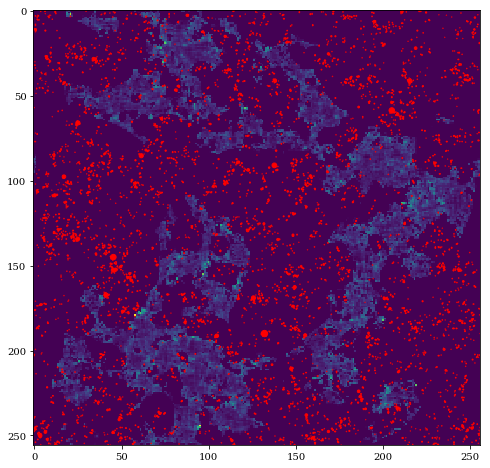

In [83]:
plt.figure(figsize=(8,8))
plt.scatter(halos[idxs,2]*256,halos[idxs,1]*256 , c='r',s=halos[idxs,0]/halos[idxs,0].max()*40)
plt.imshow(data_3d[:,:,128],aspect='auto',vmin=0,vmax=100)
plt.show()

In [86]:
data = load_binary_data('/data4/tcox/runs/full_run_1/Boxes/Nrec_z007.04_HIIfilter1_RHIImax50_256_200Mpc')
nrec_3d = np.reshape(data, (256,256,256))

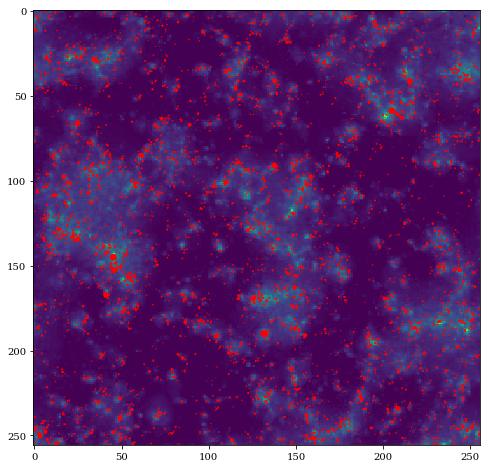

In [88]:
plt.figure(figsize=(8,8))
plt.scatter(halos[idxs,2]*256,halos[idxs,1]*256 , c='r',s=halos[idxs,0]/halos[idxs,0].max()*40)
plt.imshow(nrec_3d[:,:,128],aspect='auto')
plt.show()

In [90]:
spin_temp = load_binary_data('/data4/tcox/runs/full_run_1/Boxes/Ts_z007.04_L_X3.2e+40_alphaX1.0_f_star0.0500_alpha_star0.5000_f_esc0.1000_alpha_esc-0.5000_Mturn5.0e+08_t_star0.5000_Pop2_256_200Mpc')
spin_temp_3d = np.reshape(spin_temp, (256, 256, 256))

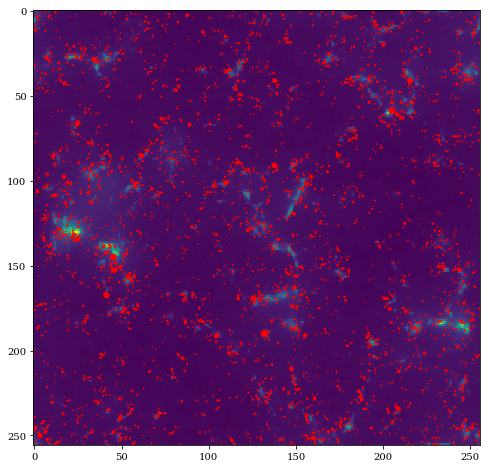

In [91]:
plt.figure(figsize=(8,8))
plt.scatter(halos[idxs,2]*256,halos[idxs,1]*256 , c='r',s=halos[idxs,0]/halos[idxs,0].max()*40)
plt.imshow(spin_temp_3d[:,:,128],aspect='auto')
plt.show()